# House Prices - Statistical Analysis

## Loading data

In [1]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from statistics import mean

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import linregress

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Basic Information

In [3]:
data.shape

(1460, 81)

In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


There are multiple types of features. A lot features have missing values. Most of the features are object types.

## Data Cleaning & Transformation

In [7]:
data2 = data.copy()

**Missing data**

Checking on and dealing with missing values

In [8]:
data2.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [9]:
missing_values=data2.isnull().sum()

In [10]:
#Filter the columns with missing values and their percentages on missing values
missing_values_percentage=missing_values.loc[missing_values.gt(0)]/len(data2)
missing_values_percentage

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [11]:
#Save in a list in order to eliminate the columns with equal and higher percentage than 0.472603 on missing values
drop_columns=list(missing_values_percentage[missing_values_percentage >= 0.47].index)
drop_columns

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [12]:
#Copying data and using data.drop()

data3 = data2.drop(drop_columns, axis=1).copy()
data3

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


## Exploratory Analysis and Visualization

**Examination of the sales price feature**

My focus is on the SalePrice variable. I will examine it in the following through visualization.

C:\Users\Anna\Anaconda3\envs\ironhack\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


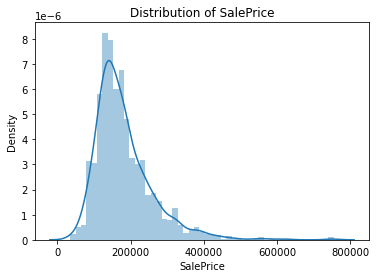

In [13]:
ax = sns.distplot(data["SalePrice"])
ax.set_xlabel("SalePrice")
ax.set_title('Distribution of SalePrice');

SalePrice is fairly normally distributed which is essential for later assumptions on multiple linear regression modelling. It is right-skewed.

C:\Users\Anna\Anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


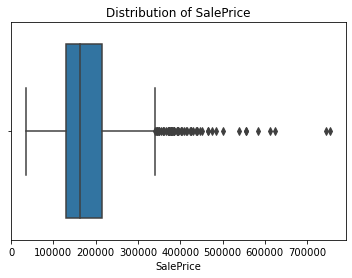

In [14]:
ax = sns.boxplot(data["SalePrice"])
ax.set_xlabel("SalePrice")
ax.set_title('Distribution of SalePrice');

The interquartile range appears to be fairly small and there appear to be many outliers present on the pricier side.

**General exploration of the features**

To get a feel for the data, I randomly chose to look into the relationship between SalePrice and Great Living Area.

NameError: name 'slope' is not defined

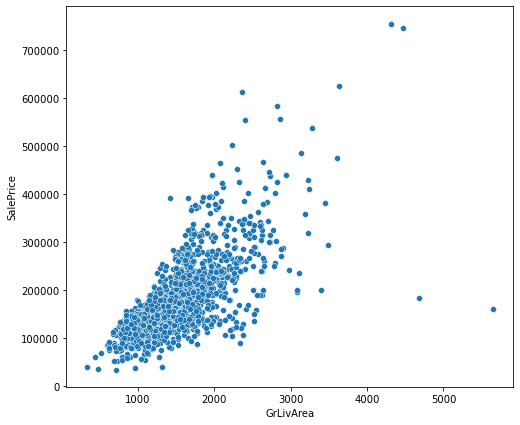

In [15]:
fig = plt.figure(figsize=(8, 7))

sns.scatterplot(data=data3, x=data3.GrLivArea, y=data3.SalePrice)

plt.plot(data3.OverallQual, slope*data3.OverallQual + intercept, color= 'r')


plt.title('GrLivArea vs. SalePrice\n', size=18);

Larger living area means higher price. However, there are two or three houses which appear to be cheap and offer huge living areas? Odd.

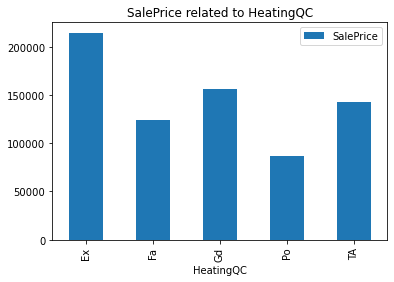

In [16]:
data3[['HeatingQC','SalePrice']].groupby('HeatingQC').mean().plot(kind='bar', title ='SalePrice related to HeatingQC');

Heating Quality determines Sales Price (also as expected).

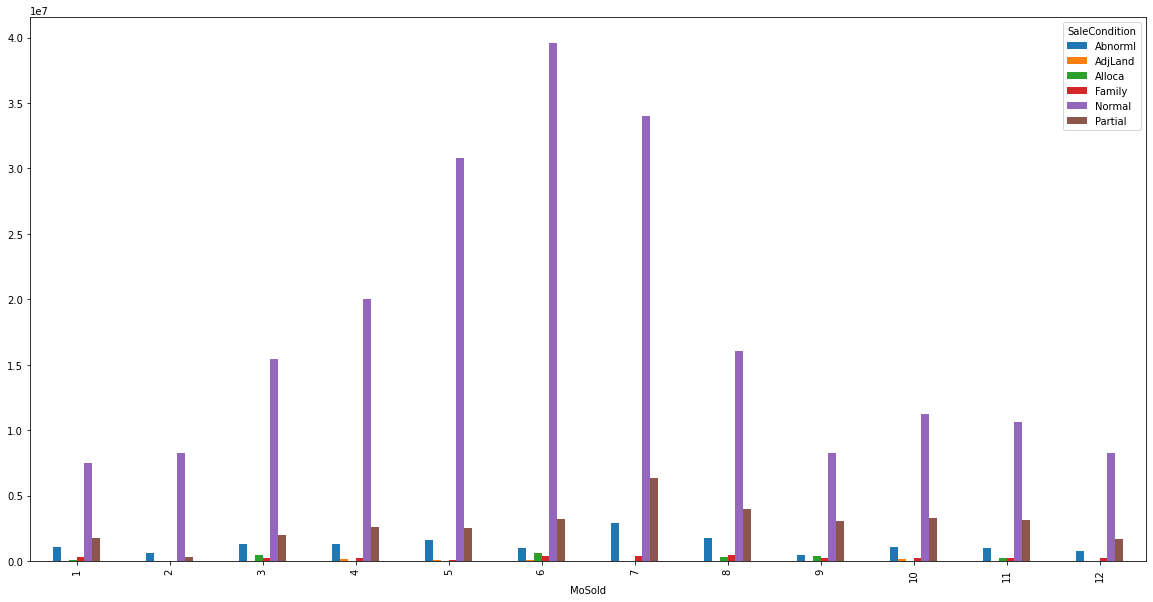

In [20]:
data3.pivot_table(values='SalePrice', index='MoSold', columns='SaleCondition', aggfunc=sum, fill_value=0).plot(kind='bar', figsize=(20,10));

Interesting. Highest sales price is achieved within a "normal" sale condition in the months june and july.

**In -depth examination of the relationships between the sales price and other features in the dataset**

In [ ]:
#make correlation matrix
data3_corr = data3.drop('Id', axis=1).corr() #ID column useless as there already is an index column present in the dataset

fig, ax = plt.subplots(figsize=(10, 8))

# make a mask to only show half the table because it would be duplicated
mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

# choosing colors
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plot heatmap
sns.heatmap(data3_corr, cmap=cmap, mask=mask, annot=False, fmt=".2f",
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0);

Visibly, there is a very positive tendency in the strength of the linear relationship /correlation between SaluePrice and other variables. The heatmap shows that for instance, OverallQual, GrLivArea, GarageCars and GarageArea appear to have a direct impact on the SalePrice. Let's further deepen this observation with the variable OverallQual. 

## Regression Analysis

I want to know if the relationship between SalePrice and OveralQuall indeed is lineal or not, and therefore if it is appropriate to model it with a linear regression.

In [73]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data3.OverallQual, data3.SalePrice)

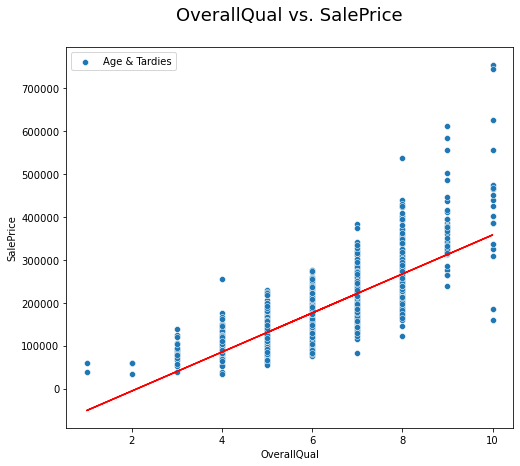

In [76]:
#Draw a dispersion diagram (scatter plot) for the data, and fit a regression line

fig = plt.figure(figsize=(8, 7))

sns.scatterplot(data=data3, x=data3.OverallQual, y=data3.SalePrice, label='Age & Tardies')

plt.plot(data3.OverallQual, slope*data3.OverallQual + intercept, color= 'r')


plt.title('OverallQual vs. SalePrice\n', size=18);

In [77]:
print(p_value, r_value**2)

2.185675268e-313 0.6256518924621178


In [78]:
X = sm.add_constant(data3.OverallQual)
Y = data3.SalePrice

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          2.19e-313
Time:                        23:51:13   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.621e+04   5756.407    -16.713      

The r squared is .63 which is moderately high. This means that our model captures 63% of the variation in SalesPrice which can be explained by OverallQual. The p-value is very small, this means that we will reject the null hypothesis that there is no mutual impact between OverallQual and SalePrice. There is indeed a relationship between both.

Statistical Analysis

Hypothesis Test

H0: The earlier built date of the house result in the lower house price.
H1: The earlier built date of the house not result in the lower house price.

In [33]:
from scipy import stats

In [34]:
X = data['YearBuilt'].array
Y = data['SalePrice'].array
result = stats.pearsonr(X,Y)
print(result)

(0.5228973328794969, 2.9902290990158995e-103)


As the p-value is shown from the Pearson Correlation test, the p-value is way less than significance level of 0.05. Therefore, we shall reject null hypothesis based on the p-value output from Pearson test.

## Source:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview